# Etude sur Alien vs Predator - épisode 2

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

Contexte du projet

L'épisode 1 a mis en évidence le surapprentissage de notre CNN qui induit de bien piètres performances. L'idée de cet épisode 2 est d'étudier la technique dite de "data augmentation" qui permet entres autres d'éliminer ce sur-apprentissage et potentiellement d'améliorer les performances de la reconnaissance d'images.
​
Le but de ce brief est donc d'appliquer la technique de "data augmentation" au CNN défini dans l'épisode 1. Pour cela :

    Utiliser la fonction ImageDataGenerator() proposée par la librairie Keras/TensorFlow pour effectuer la "data augmentation" (uniquement) sur le jeu d'apprentissage ;
    Entrainer le CNN en mode "full batch" sur 500 epoch ;
    Conclure.



エピソード1では、CNNの過学習が非常に低いパフォーマンスをもたらすことが強調されました。このエピソード2では、この過学習を解消し、画像認識の性能を向上させる可能性のある「データ補強」と呼ばれる技術を研究しています。そこで、本報告では、エピソード1で定義したCNNに「データ補強」技術を適用することを目的とする。 そのために

Keras/TensorFlowライブラリが提案するImageDataGenerator()関数を使用して、トレーニングセットに対してデータ拡張（のみ）を実行します。
CNNを「フルバッチ」モードで500エポック学習させる。
結論を出す。

### 1 - import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des images

In [3]:
dataset_dir = 'Data/'

TRAINING_DIR = dataset_dir + 'train/'
VALIDATION_DIR = dataset_dir + 'validation/'

In [4]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = augmented_datagen.flow_from_directory(TRAINING_DIR,
                                            target_size = (150, 150),                                             
                                            batch_size = 494,
                                            class_mode="binary",
                                                        #seed=0
                                             )

Found 494 images belonging to 2 classes.


In [7]:
X_train = train_generator[0][0]
y_train=  train_generator[0][1]

In [8]:
X_train.shape

(494, 150, 150, 3)

In [9]:
val_generator = datagen.flow_from_directory(VALIDATION_DIR,
                                            target_size=(150, 150),
                                            batch_size = 200,
                                            class_mode="binary",
                                            #seed=0
                                           )

Found 200 images belonging to 2 classes.


In [10]:
X_val = val_generator[0][0]
y_val = val_generator[0][1]

In [11]:
model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [14]:
# il faut mettre train_generator car des images bougent et train_generator change mais X_train ne change pas
history = model.fit(
        train_generator,
        epochs=500,
        validation_data=val_generator,
        steps_per_epoch=1,
        #batch_size=X_train.shape[0], #steps_per_epoch=1 : same but we use often steps_per_epoch=1 for fullbatch for train
        validation_steps=1
)

#validation_steps。validation_data が tf.data データセットである場合のみ有効である。
#エポック終了ごとに検証を行う場合、停止するまでの総ステップ数（サンプルのバッチ数）。validation_steps' が None の場合、validation_data データセットがなくなるまで検証を行う。データセットが無限に繰り返される場合、無限ループに陥る。validation_steps' が指定され、かつデータセットの一部しか消費されない場合、各エポックにおいてデータセットの先頭から評価が開始されます。これにより、毎回同じ検証用サンプルが使われることになる。

Epoch 1/500
1/1 [==============================] - 10s 10s/step - loss: 0.6905 - accuracy: 0.5526 - val_loss: 1.6439 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 9s 9s/step - loss: 1.5126 - accuracy: 0.5000 - val_loss: 2.7796 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 10s 10s/step - loss: 2.6410 - accuracy: 0.5000 - val_loss: 1.7207 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 9s 9s/step - loss: 1.6705 - accuracy: 0.5000 - val_loss: 0.9165 - val_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 10s 10s/step - loss: 0.9097 - accuracy: 0.5000 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 9s 9s/step - loss: 0.6815 - accuracy: 0.5000 - val_loss: 0.6619 - val_accuracy: 0.5850
Epoch 7/500
1/1 [==============================] - 9s 9s/step - loss: 0.6456 - accuracy: 0.6275 - val_loss: 0.6843 - val_accuracy: 0.5100
Epoch 8/500
1/1 [===========

Epoch 60/500
1/1 [==============================] - 9s 9s/step - loss: 0.4855 - accuracy: 0.7854 - val_loss: 0.5934 - val_accuracy: 0.7650
Epoch 61/500
1/1 [==============================] - 9s 9s/step - loss: 0.4940 - accuracy: 0.7611 - val_loss: 0.5946 - val_accuracy: 0.7800
Epoch 62/500
1/1 [==============================] - 9s 9s/step - loss: 0.4762 - accuracy: 0.7672 - val_loss: 0.6434 - val_accuracy: 0.7450
Epoch 63/500
1/1 [==============================] - 9s 9s/step - loss: 0.4795 - accuracy: 0.7773 - val_loss: 0.5856 - val_accuracy: 0.7700
Epoch 64/500
1/1 [==============================] - 9s 9s/step - loss: 0.4643 - accuracy: 0.7895 - val_loss: 0.5837 - val_accuracy: 0.7450
Epoch 65/500
1/1 [==============================] - 9s 9s/step - loss: 0.4640 - accuracy: 0.7611 - val_loss: 0.6084 - val_accuracy: 0.7600
Epoch 66/500
1/1 [==============================] - 9s 9s/step - loss: 0.4652 - accuracy: 0.8057 - val_loss: 0.6269 - val_accuracy: 0.7600
Epoch 67/500
1/1 [=========

Epoch 119/500
1/1 [==============================] - 9s 9s/step - loss: 0.4152 - accuracy: 0.8158 - val_loss: 0.5953 - val_accuracy: 0.7700
Epoch 120/500
1/1 [==============================] - 9s 9s/step - loss: 0.4109 - accuracy: 0.8036 - val_loss: 0.5476 - val_accuracy: 0.7850
Epoch 121/500
1/1 [==============================] - 9s 9s/step - loss: 0.3707 - accuracy: 0.8279 - val_loss: 0.5347 - val_accuracy: 0.7750
Epoch 122/500
1/1 [==============================] - 9s 9s/step - loss: 0.4184 - accuracy: 0.8138 - val_loss: 0.5548 - val_accuracy: 0.7850
Epoch 123/500
1/1 [==============================] - 9s 9s/step - loss: 0.4049 - accuracy: 0.8259 - val_loss: 0.5125 - val_accuracy: 0.7750
Epoch 124/500
1/1 [==============================] - 9s 9s/step - loss: 0.4008 - accuracy: 0.8036 - val_loss: 0.5304 - val_accuracy: 0.7750
Epoch 125/500
1/1 [==============================] - 9s 9s/step - loss: 0.3869 - accuracy: 0.8320 - val_loss: 0.5200 - val_accuracy: 0.7900
Epoch 126/500
1/1 [=

1/1 [==============================] - 9s 9s/step - loss: 0.3391 - accuracy: 0.8360 - val_loss: 0.5154 - val_accuracy: 0.7850
Epoch 178/500
1/1 [==============================] - 9s 9s/step - loss: 0.3481 - accuracy: 0.8462 - val_loss: 0.5321 - val_accuracy: 0.7900
Epoch 179/500
1/1 [==============================] - 9s 9s/step - loss: 0.3505 - accuracy: 0.8522 - val_loss: 0.5422 - val_accuracy: 0.7750
Epoch 180/500
1/1 [==============================] - 9s 9s/step - loss: 0.3108 - accuracy: 0.8725 - val_loss: 0.5172 - val_accuracy: 0.7800
Epoch 181/500
1/1 [==============================] - 9s 9s/step - loss: 0.3510 - accuracy: 0.8502 - val_loss: 0.5233 - val_accuracy: 0.7800
Epoch 182/500
1/1 [==============================] - 9s 9s/step - loss: 0.3476 - accuracy: 0.8482 - val_loss: 0.5441 - val_accuracy: 0.7800
Epoch 183/500
1/1 [==============================] - 9s 9s/step - loss: 0.3502 - accuracy: 0.8360 - val_loss: 0.5334 - val_accuracy: 0.7900
Epoch 184/500
1/1 [===============

1/1 [==============================] - 9s 9s/step - loss: 0.3324 - accuracy: 0.8563 - val_loss: 0.6311 - val_accuracy: 0.7900
Epoch 236/500
1/1 [==============================] - 9s 9s/step - loss: 0.3109 - accuracy: 0.8644 - val_loss: 0.5985 - val_accuracy: 0.7700
Epoch 237/500
1/1 [==============================] - 9s 9s/step - loss: 0.2962 - accuracy: 0.8806 - val_loss: 0.5937 - val_accuracy: 0.7750
Epoch 238/500
1/1 [==============================] - 9s 9s/step - loss: 0.2964 - accuracy: 0.8704 - val_loss: 0.6558 - val_accuracy: 0.7750
Epoch 239/500
1/1 [==============================] - 9s 9s/step - loss: 0.3141 - accuracy: 0.8623 - val_loss: 0.6350 - val_accuracy: 0.7650
Epoch 240/500
1/1 [==============================] - 9s 9s/step - loss: 0.3059 - accuracy: 0.8522 - val_loss: 0.6098 - val_accuracy: 0.7750
Epoch 241/500
1/1 [==============================] - 9s 9s/step - loss: 0.2853 - accuracy: 0.8806 - val_loss: 0.6637 - val_accuracy: 0.7900
Epoch 242/500
1/1 [===============

1/1 [==============================] - 9s 9s/step - loss: 0.2981 - accuracy: 0.8644 - val_loss: 0.6673 - val_accuracy: 0.7600
Epoch 294/500
1/1 [==============================] - 9s 9s/step - loss: 0.2407 - accuracy: 0.9008 - val_loss: 0.7044 - val_accuracy: 0.7400
Epoch 295/500
1/1 [==============================] - 9s 9s/step - loss: 0.2813 - accuracy: 0.8543 - val_loss: 0.6476 - val_accuracy: 0.7850
Epoch 296/500
1/1 [==============================] - 9s 9s/step - loss: 0.2608 - accuracy: 0.8927 - val_loss: 0.6233 - val_accuracy: 0.7900
Epoch 297/500
1/1 [==============================] - 9s 9s/step - loss: 0.2954 - accuracy: 0.8664 - val_loss: 0.6220 - val_accuracy: 0.7600
Epoch 298/500
1/1 [==============================] - 9s 9s/step - loss: 0.2938 - accuracy: 0.8664 - val_loss: 0.6668 - val_accuracy: 0.7950
Epoch 299/500
1/1 [==============================] - 9s 9s/step - loss: 0.2616 - accuracy: 0.8806 - val_loss: 0.7303 - val_accuracy: 0.7850
Epoch 300/500
1/1 [===============

1/1 [==============================] - 9s 9s/step - loss: 0.2514 - accuracy: 0.8968 - val_loss: 0.7443 - val_accuracy: 0.8000
Epoch 352/500
1/1 [==============================] - 9s 9s/step - loss: 0.2444 - accuracy: 0.8927 - val_loss: 0.8488 - val_accuracy: 0.7850
Epoch 353/500
1/1 [==============================] - 9s 9s/step - loss: 0.2496 - accuracy: 0.8785 - val_loss: 0.8408 - val_accuracy: 0.7550
Epoch 354/500
1/1 [==============================] - 9s 9s/step - loss: 0.2382 - accuracy: 0.8907 - val_loss: 0.8229 - val_accuracy: 0.7900
Epoch 355/500
1/1 [==============================] - 9s 9s/step - loss: 0.2478 - accuracy: 0.8927 - val_loss: 0.6994 - val_accuracy: 0.8000
Epoch 356/500
1/1 [==============================] - 9s 9s/step - loss: 0.2483 - accuracy: 0.8907 - val_loss: 0.6942 - val_accuracy: 0.8000
Epoch 357/500
1/1 [==============================] - 9s 9s/step - loss: 0.2447 - accuracy: 0.8887 - val_loss: 0.7513 - val_accuracy: 0.8150
Epoch 358/500
1/1 [===============

1/1 [==============================] - 9s 9s/step - loss: 0.2112 - accuracy: 0.9211 - val_loss: 0.7673 - val_accuracy: 0.8050
Epoch 410/500
1/1 [==============================] - 9s 9s/step - loss: 0.2287 - accuracy: 0.9089 - val_loss: 0.7525 - val_accuracy: 0.8000
Epoch 411/500
1/1 [==============================] - 9s 9s/step - loss: 0.2008 - accuracy: 0.9130 - val_loss: 0.8155 - val_accuracy: 0.7950
Epoch 412/500
1/1 [==============================] - 9s 9s/step - loss: 0.2087 - accuracy: 0.9069 - val_loss: 0.8602 - val_accuracy: 0.7900
Epoch 413/500
1/1 [==============================] - 9s 9s/step - loss: 0.2107 - accuracy: 0.9109 - val_loss: 0.8218 - val_accuracy: 0.8000
Epoch 414/500
1/1 [==============================] - 9s 9s/step - loss: 0.2092 - accuracy: 0.9109 - val_loss: 0.8124 - val_accuracy: 0.8000
Epoch 415/500
1/1 [==============================] - 9s 9s/step - loss: 0.2018 - accuracy: 0.9211 - val_loss: 0.8104 - val_accuracy: 0.8000
Epoch 416/500
1/1 [===============

1/1 [==============================] - 9s 9s/step - loss: 0.1916 - accuracy: 0.9231 - val_loss: 0.8824 - val_accuracy: 0.8000
Epoch 468/500
1/1 [==============================] - 9s 9s/step - loss: 0.1867 - accuracy: 0.9170 - val_loss: 0.8331 - val_accuracy: 0.8150
Epoch 469/500
1/1 [==============================] - 9s 9s/step - loss: 0.1443 - accuracy: 0.9393 - val_loss: 0.8063 - val_accuracy: 0.8000
Epoch 470/500
1/1 [==============================] - 9s 9s/step - loss: 0.1882 - accuracy: 0.9271 - val_loss: 0.8583 - val_accuracy: 0.8000
Epoch 471/500
1/1 [==============================] - 9s 9s/step - loss: 0.1999 - accuracy: 0.9251 - val_loss: 0.9089 - val_accuracy: 0.7450
Epoch 472/500
1/1 [==============================] - 9s 9s/step - loss: 0.1687 - accuracy: 0.9211 - val_loss: 0.9173 - val_accuracy: 0.7850
Epoch 473/500
1/1 [==============================] - 9s 9s/step - loss: 0.1756 - accuracy: 0.9271 - val_loss: 0.9057 - val_accuracy: 0.8050
Epoch 474/500
1/1 [===============

In [24]:
#history.history['loss']

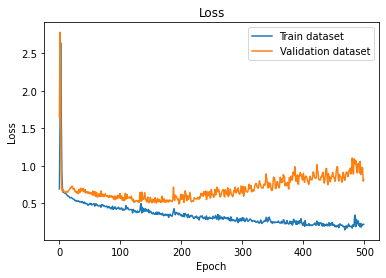

In [16]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train dataset')
plt.plot(history.history['val_loss'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

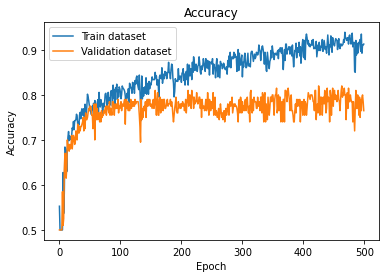

In [17]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train dataset')
plt.plot(history.history['val_accuracy'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

confusion matrix

In [18]:
y_train_pred = model.predict(X_train)
y_train_pred  = y_train_pred > 0.5

cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[243,   4],
       [ 43, 204]], dtype=int64)

In [22]:
y_val_pred = model.predict(X_val)
y_val_pred  = y_val_pred > 0.5

cm_val = confusion_matrix(y_val, y_val_pred)
cm_val

array([[82, 18],
       [29, 71]], dtype=int64)

affichage classification report

In [19]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.85      0.98      0.91       247
  Predator 1       0.98      0.83      0.90       247

    accuracy                           0.90       494
   macro avg       0.92      0.90      0.90       494
weighted avg       0.92      0.90      0.90       494



In [23]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_val, y_val_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.74      0.82      0.78       100
  Predator 1       0.80      0.71      0.75       100

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



save the model

In [20]:
model.save('model_ep2')

INFO:tensorflow:Assets written to: model_ep2\assets


In [21]:
mm

NameError: name 'mm' is not defined

In [ ]:
# ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://github.com/tkeldenich/Computer_Vision_CNN_DataAugmentation/blob/main/Computer_Vision_CNN_DataAugmentation.ipynb